In [34]:
import numpy as np
import pandas as pd

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'matplotlib.rc'

In [50]:
tstamp = "01_02_2022_11_06"

In [94]:
overview = pd.read_csv("results/overview_synthetic_data.csv")
metavals = overview[(overview.tstamp==tstamp) & (overview.typ == "train")].iloc[0]
meta = (f"Dataset {metavals.tstamp} with parameters:\n"
        f"alpha = {metavals.alphamin}-{metavals.alphamax}\n"
        f"beta = {metavals.betamin}-{metavals.betamax}\n"
        f"{metavals.n_spots_min}-{metavals.n_spots_max} spots\n"
        f"spot radius  = {metavals.spot_radius}\n"
        f"{metavals.n_lcs} light curves\n"
        f"ED decomposition: {metavals.decomposeed}\n\n")

In [2]:
df = pd.read_csv(f"results/2022_02_03_{tstamp}_flares_train_merged.csv")
df.shape

(9241, 15)

In [3]:
colids = np.where([("diff" in x) for x in  df.columns.values])[0]
columns = df.columns.values[colids]
columns

array(['diff_tstart_kurtosis_stepsize1', 'diff_tstart_skew_stepsize1',
       'diff_tstart_std_over_mean_stepsize1',
       'diff_tstart_kurtosis_stepsize2', 'diff_tstart_skew_stepsize2',
       'diff_tstart_std_over_mean_stepsize2',
       'diff_tstart_kurtosis_stepsize3', 'diff_tstart_skew_stepsize3',
       'diff_tstart_std_over_mean_stepsize3'], dtype=object)

In [4]:
df = df.fillna(-999)

In [5]:
x = df[columns].values 
x.shape

(9241, 9)

In [6]:
y = df["midlat2"].values

In [7]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y) 

RandomForestRegressor(random_state=0)

In [9]:
# read validation data
valid = pd.read_csv("results/2022_02_03_01_02_2022_11_06_flares_validate_merged.csv")
valid.head()

,Unnamed: 0,midlat_deg,diff_tstart_kurtosis_stepsize1,diff_tstart_skew_stepsize1,diff_tstart_std_over_mean_stepsize1,diff_tstart_kurtosis_stepsize2,diff_tstart_skew_stepsize2,diff_tstart_std_over_mean_stepsize2,diff_tstart_kurtosis_stepsize3,diff_tstart_skew_stepsize3,diff_tstart_std_over_mean_stepsize3,midlat2,minlat,maxlat,latwidth
0,0,"(0.00045, 0.196]",7.540659,2.559449,1.134128,2.308509,1.635207,0.896786,1.109042,1.257161,0.706328,0.098268,0.000450,0.196086,0.195635
1,1,"(0.196, 0.392]",27.854933,4.494722,1.440364,14.923500,3.254285,1.023874,6.508577,2.354908,0.875507,0.293903,0.196086,0.391721,0.195635
2,2,"(0.392, 0.587]",27.644358,4.997961,1.800241,12.793901,3.495478,1.287451,7.957352,2.786769,0.992316,0.489539,0.391721,0.587356,0.195635
3,3,"(0.587, 0.783]",26.274518,4.560698,1.434276,16.141716,3.335261,0.951442,11.069348,2.648229,0.733716,0.685174,0.587356,0.782992,0.195635
4,4,"(0.783, 0.979]",37.364216,5.484316,1.487460,14.689484,3.535619,1.062855,8.568360,2.773516,0.864833,0.880809,0.782992,0.978627,0.195635


In [10]:
valid = valid.fillna(-999)
validx = valid[columns].values 
validy = valid['midlat2'].values
validx.shape

(921, 9)

In [11]:
predictions = regressor.predict(validx)

In [12]:
errors = predictions - validy

In [14]:
feature_list = list(valid[columns].columns.values)

In [98]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
legend = "".join(["Feature importance:\n"] + ['{:.2f} -- {}\n'.format(*pair[::-1]) for pair in feature_importances])

In [99]:
extranote = "\nNote:\nactive latitude restricted to one hemisphere"
legend = meta + legend + extranote

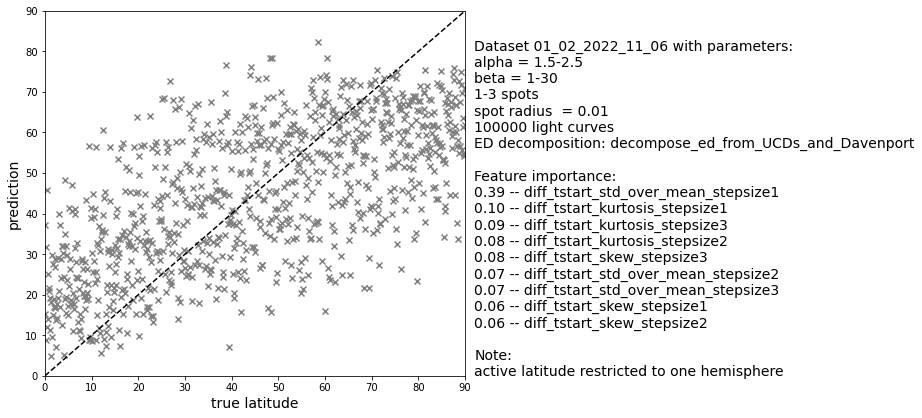

In [100]:
plt.figure(figsize=(13,6))
plt.scatter(validy, predictions, 
            marker="x",c="grey",)
plt.plot([0,90], [0,90], c="k", linestyle="dashed")
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel("true latitude", fontsize=14)
plt.ylabel("prediction", fontsize=14)
plt.text(x=92, y=0,s=legend, fontsize=14)
plt.tight_layout()

## related notes

In [ ]:
from flares.decomposeed import decompose_ed_randomly_and_using_Davenport

Text(0, 0.5, 'FWHM [d]')

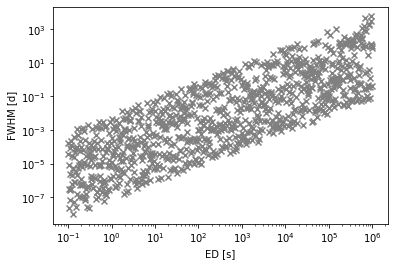

In [87]:
ed = np.logspace(-1,6,1000)
a, fwhm = decompose_ed_randomly_and_using_Davenport(ed)
plt.scatter(ed, fwhm, marker="x", c="grey")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("FWHM [d]")

Text(0, 0.5, 'rel. amplitude')

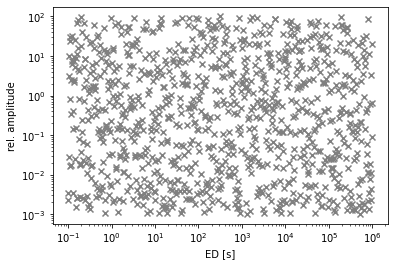

In [88]:
ed = np.logspace(-1,6,1000)
a, fwhm = decompose_ed_randomly_and_using_Davenport(ed)
plt.scatter(ed, a, marker="x", c="grey")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("rel. amplitude")

In [23]:
dd = pd.read_csv("results/2022_01_10_flares_alpha_beta_rand.csv", names=['istart','istop','tstart','tstop',                  
                              'ed_rec','ed_rec_err','ampl_rec',
                              'dur','total_n_valid_data_points','midlat_deg',
                              'inclination_deg','n_spots','beta_1',
                              'beta_2','beta_3','alpha_1',
                              'alpha_2','alpha_3','lons_1',
                              'lons_2','lons_3','starid']
           )

<AxesSubplot:>

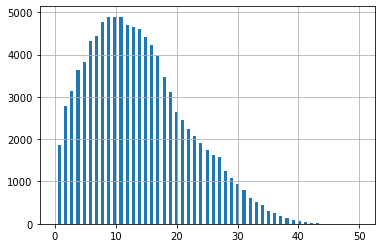

In [22]:
dd.groupby("starid").tstart.count().hist(bins=np.linspace(0,50,100))

<AxesSubplot:>

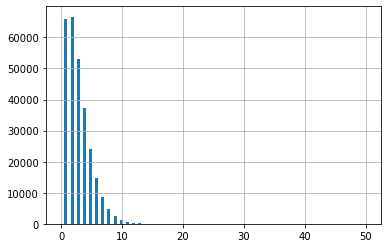

In [24]:
dd.groupby("starid").tstart.count().hist(bins=np.linspace(0,50,100))